<a href="https://colab.research.google.com/github/daniyalaamir110/ML_course/blob/main/sigmoid_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([500, 501, 502, 503, 504, 505, 506, 507, 508, 509])
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

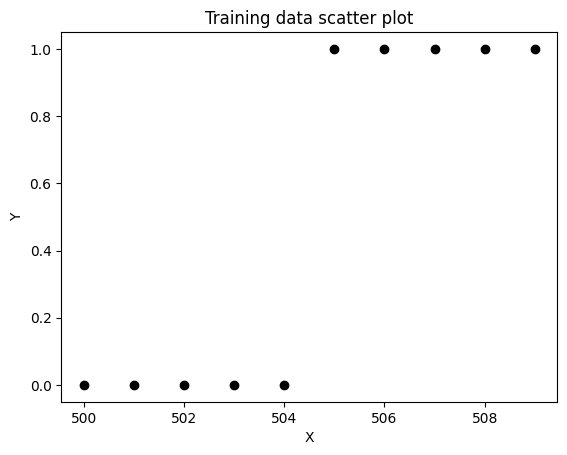

In [3]:
plt.scatter(X_train, y_train, color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training data scatter plot")
plt.show()

In [4]:
def get_linear_model(x, y):
  m = x.shape[0]

  sigma_x = np.sum(x)
  sigma_y = np.sum(y)
  sigma_x2 = np.sum(x ** 2)
  sigma_xy = np.sum(x * y)

  w = (sigma_y * sigma_x2 - sigma_x * sigma_xy) / (sigma_x2 - sigma_x ** 2)
  b = (sigma_y - w * sigma_x) / m

  def linear_model(x):
    y = w * x + b
    return y

  return linear_model

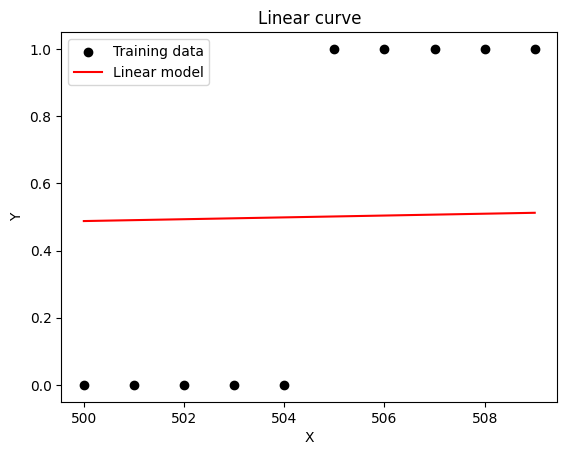

In [5]:
linear_model = get_linear_model(X_train, y_train)
min_x = np.min(X_train)
max_x = np.max(X_train)
X_linear = np.linspace(min_x, max_x, 100)
y_linear = linear_model(X_linear)
plt.scatter(X_train, y_train, label="Training data", color="black")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear curve")
plt.plot(X_linear, y_linear, c="red", label="Linear model")
plt.legend()
plt.show()

In [6]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [7]:
def get_logistic_model(linear_model, threshold):

  def logistic_model(x):
    z = linear_model(x)
    y = sigmoid(z - threshold)

    return y

  return logistic_model

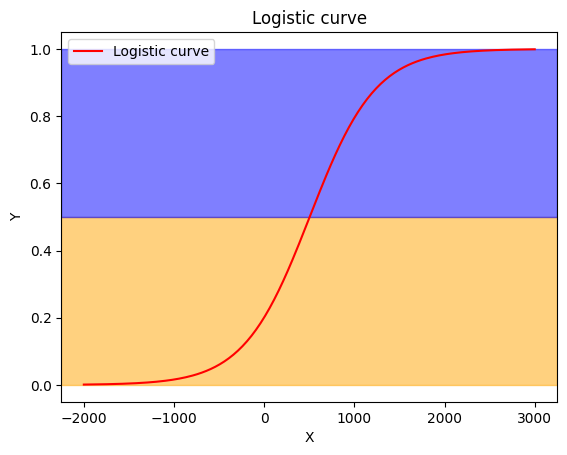

In [8]:
threshold = 0.5
linear_model = get_linear_model(X_train, y_train)
logistic_model = get_logistic_model(linear_model, threshold)
X_linear = np.linspace(-2000, 3000, 200)
y_logistic = logistic_model(X_linear)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Logistic curve")
plt.axhspan(0, threshold, color='orange', alpha=0.5)
plt.axhspan(threshold, 1, color='blue', alpha=0.5)
plt.plot(X_linear, y_logistic, c="r", label="Logistic curve")
plt.legend()
plt.show()

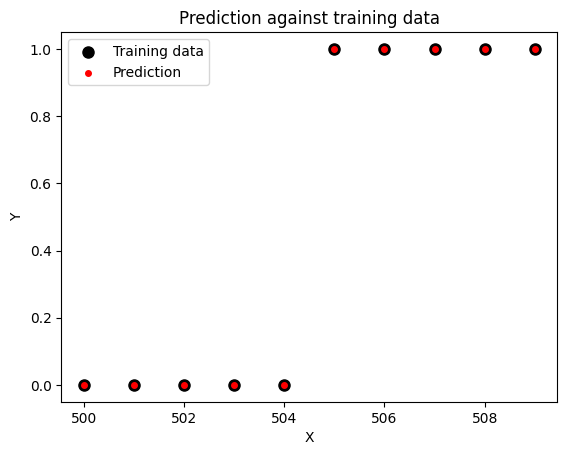

In [9]:
y_pred = logistic_model(X_train) > threshold
plt.scatter(X_train, y_train, label="Training data", s=64, c="black")
plt.scatter(X_train, y_pred, label="Prediction", s=16, c="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Prediction against training data")
plt.legend()
plt.show()